In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)
library(scales)

In [3]:
scientific_10 <- function(x) {
    if(x == 0) {
      return(expression(0))
    }
  parse(text=gsub("e", " %*% 10^", scientific_format()(x)))
}

In [4]:
precomputed_densities = read.csv("../data/precomputed_kde_fig1b_20170508.csv")

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
“Removed 1000 rows containing missing values (geom_path).”

Warning message:
“Removed 1000 rows containing missing values (geom_path).”

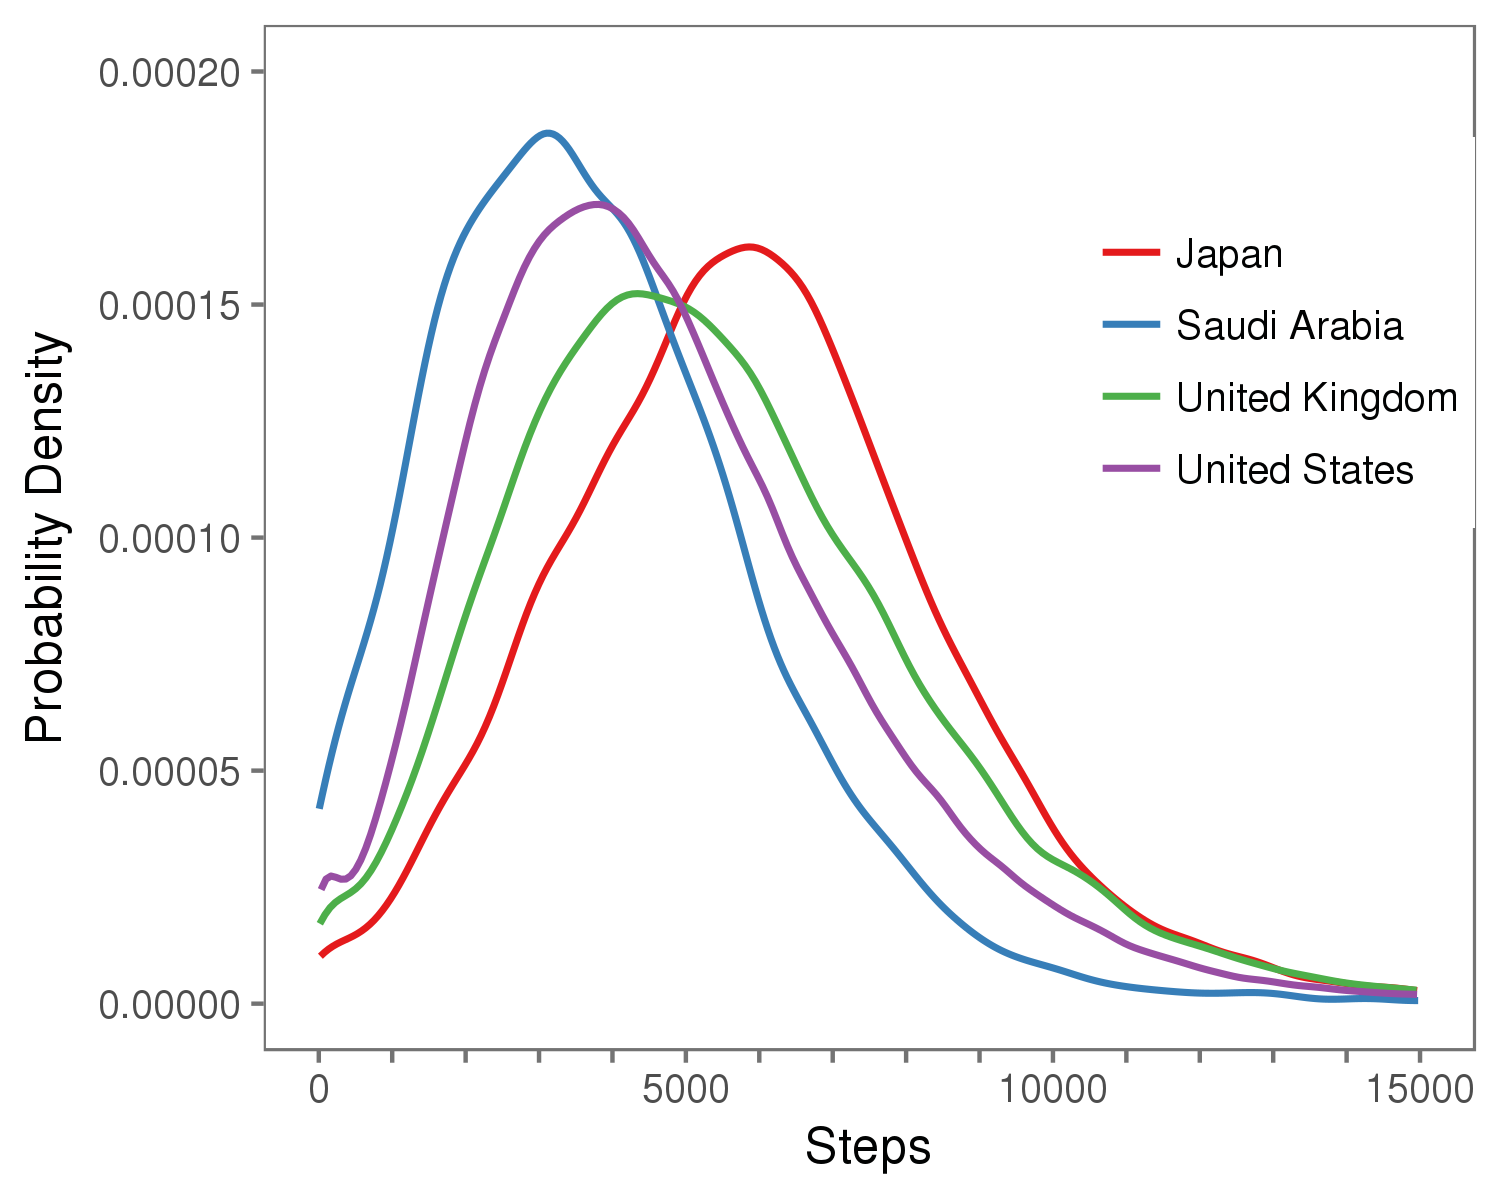

In [5]:
p = ggplot()

# p = p + geom_line(data=df_filtered, aes(x=n_steps, color=country), stat="density", size=.8) # before
p = p + geom_line(data=precomputed_densities, aes(x, y, color=country), size=.8) # new

p = p + xlim(0,15000)
p <- p + labs(fill = "")
p <- p + labs(color = "")
p <- p + labs(linetype = "")
p <- p + xlab("Steps") + ylab("Probability Density") 
p <- p + scale_colour_brewer(palette="Set1")
p <- p + scale_linetype_manual(values=c("dotdash", "dotted", "dashed", "solid")) 
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + theme(legend.justification=c(1,.5), legend.position=c(1,.7))

# xticks
ticks = seq(0,15000,by=1000) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%d", ticks[seq(1, length(labels), 5)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(0,15000))

# yticks
ticks = seq(0.0,2e-4,by=5e-5) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 1)] = sapply(ticks[seq(1, length(labels), 1)], scientific_10) #sprintf("%.4f", ticks[seq(1, length(labels), 5)])
p <- p + scale_y_continuous(breaks=ticks, limits=c(0,2e-4))#, labels=labels)

p 

ggsave(filename="../output/fig1b.pdf", plot=p, width=4, height=3)